In [165]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare
data1 = pd.read_excel("result_data.xlsx",sheet_name="simutime")
data2 = pd.read_excel("result_data.xlsx",sheet_name="homo")
data3 = pd.read_excel("result_data.xlsx",sheet_name="heter")

In [ ]:
mmn_queueing_jsq(n,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan,policy="jsq1")
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)
mmn_queueing_redundancy_dos(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_jsq_weibull(n,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
weibull_scale_calculator(desired_mean,shape)
system_compare(system1,system2)

In [5]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=3000,simuseed=8,policy="jsq1")
bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=3000,simuseed=8)
#ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=1000,simuseed=8)

In [4]:
dm = 1/2.2
shp = 1
aaa = mmn_queueing_jsq_weibull(5,10,weibull_scale_calculator(dm,shp),2,simulation_time=1000,simuseed=8)

In [5]:
dm = 1/2.2
shp = 1
bbb = mmn_queueing_redundancy_dos_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)
ccc = mmn_queueing_redundancy_doc_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)

In [ ]:
system_compare(aaa,bbb)

In [ ]:
lb = 3
ub = 14

sys1 = np.array([])
sys2 = np.array([])
sys3 = np.array([])
for i in range(lb,ub):
    sys1 = np.append(sys1,mmn_queueing_jsq(5,i,[3,1,4,2,5],simulation_time=300,simuseed=66,policy="jsq1")[5]['Grand Average cycle time'][0])
    sys2 = np.append(sys2,mmn_queueing_redundancy_dos(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])
    sys3 = np.append(sys3,mmn_queueing_redundancy_doc(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])


plt.plot(np.arange(lb,ub),sys1,label='system1')
plt.plot(np.arange(lb,ub),sys2,label='system2')
plt.plot(np.arange(lb,ub),sys3,label='system3')
plt.title('Comparison of three systems')
plt.xlabel('Arrival rate')
plt.ylabel('ACT')
plt.legend()

In [36]:
aaa = mmn_queueing_jsq(5,14,[3,1,4,2,5],simulation_time=1000,simuseed=66,policy="jsq1")

In [42]:
bbb = mmn_queueing_jsq(5,15.01,[3,1,4,2,5],simulation_time=1000,simuseed=88,policy="jsq1")

In [ ]:
a0pos = aaa[0]['Time'].to_numpy()[np.where(aaa[0]['Server1 Queue']==0)[0]]
b0pos = bbb[0]['Time'].to_numpy()[np.where(bbb[0]['Server1 Queue']==0)[0]]
data = [a0pos, b0pos]
fig, ax = plt.subplots()
ax.boxplot(data,vert=False)
ax.set_yticklabels(['Stable system', 'Unstable system'])
ax.set_xlabel('Simulation Time')
ax.set_title('boxplot example')
plt.show()

How long is long?

In [395]:
s1d = 39
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,policy="jsq1")
#bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=6000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(aaa,ccc)

In [ ]:
aaa[8][aaa[8]['Finish']<2000]

In [ ]:
aaa[8]

In [168]:
stats.ttest_rel(data1['homo_jsq1_2000'], data1['homo_jsq1_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [391]:
def yyy(system1):
    
    bbb = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()

    plt.plot(bbb['Time'],sys1_timing['cma'],label='jsq1')
    #plt.title('Warm up period')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()

In [ ]:
yyy(aaa)

In [238]:
s1d = 18
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#ddd = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jiq1')
#eee = mmn_queueing_jsq(4,8,2.2,simulation_time=4000,simuseed=s1d,policy='jsq1')
fff = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=4000,simuseed=s1d)

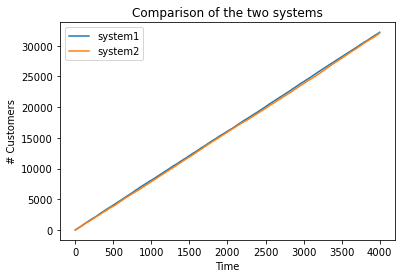

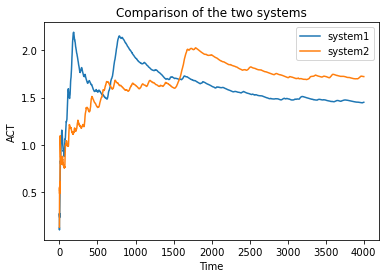

In [239]:
system_compare(fff,eee)

In [240]:
fff[8]

,Arrival_label,Start,Queue,Finish,Server,act,cma
1,1.0,0.024999,0.024999,0.149442,1.0,0.124443,0.124443
2,2.0,0.160378,0.160378,0.252234,3.0,0.091857,0.108150
3,3.0,0.539720,0.539720,0.638949,4.0,0.099229,0.105176
4,4.0,0.583499,0.583499,0.761776,2.0,0.178278,0.123451
5,5.0,0.870367,0.870367,1.783781,3.0,0.913413,0.281444
...,...,...,...,...,...,...,...
32188,32188.0,3999.142925,3999.692420,3999.884468,4.0,0.741543,1.450054
32189,32189.0,3999.185071,3999.697247,3999.799959,3.0,0.614887,1.450028
32190,32190.0,3999.360561,3999.735168,3999.853796,1.0,0.493234,1.449998
32191,32191.0,3999.452580,3999.799959,3999.899424,3.0,0.446843,1.449967


In [167]:
stats.ttest_rel(data1['homo_jiq_2000'], data1['homo_jiq_4000'])

Ttest_relResult(statistic=0.46367188623859523, pvalue=0.6454603855924186)

In [173]:
stats.ttest_rel(data1['homo_jswq_2000'], data1['homo_jswq_4000'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

Stability Analysis

In [ ]:
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)

Homo

In [831]:
s1d = 13
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)

In [ ]:
system_compare(ccc,ddd)

In [ ]:
ccc[8]

Hetero